In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

from tslearn.clustering import TimeSeriesKMeans

rcParams['figure.figsize'] =20,10
rcParams['legend.fontsize'] = 20
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 20}
plt.rc('font', **font)

C:\Users\Philipp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
#datelist = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
datelist = pd.date_range(start="2017-03-02", end="2017-04-30").strftime("%Y-%m-%d").astype(str).to_list()

#datelist = ["2017-03-02"]

In [3]:
# constants  #
#------------#
HDF5_dir = "E:\\MessdatenStoeckach\\"
resampled_dir = r'E:\resampled_phasevise'
dates = os.listdir(HDF5_dir)
phases = ["1","2","3"]

In [40]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [41]:
mask = rmsi_all_p1<2

In [42]:
shi_filtered = shi_all_p1.loc[mask[0]]

In [43]:
sharray = shi_filtered.to_numpy(copy=True)

In [44]:
sharray = sharray[:, :, np.newaxis]

In [45]:
sharray.shape

(7310, 2960, 1)

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.3s finished


44.717 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.7s finished


21.718 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.6s finished


21.718 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.5s finished


44.885 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.6s finished


29.293 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.7s finished


29.293 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.2s finished


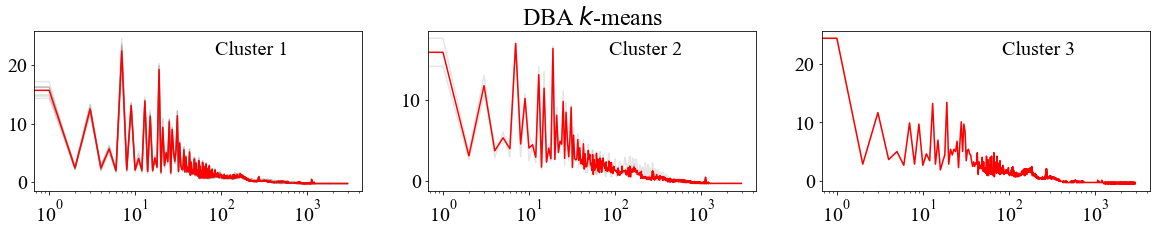

In [35]:
sh_scaled = TimeSeriesScalerMeanVariance().fit_transform(sharray)

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=100,
                          random_state=0)
y_pred = dba_km.fit_predict(sh_scaled[:10, :, :])

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in sh_scaled[:10, :, :][y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    #plt.xlim(0, sz)
    #plt.ylim(-4, 4)
    plt.xscale('log')
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.7s finished


120.337 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    5.0s finished


62.506 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


59.107 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.8s finished


58.468 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


58.338 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    5.6s finished


58.303 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


58.254 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.9s finished


58.215 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.7s finished


58.204 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


58.196 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.5s finished


58.193 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


58.193 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


123.024 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    5.2s finished


58.652 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


56.723 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


56.563 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.8s finished


56.526 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


56.482 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.7s finished


56.447 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.8s finished


56.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.9s finished


56.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


56.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.8s finished


56.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.6s finished


56.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.7s finished


56.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.9s finished


56.438 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.5s finished


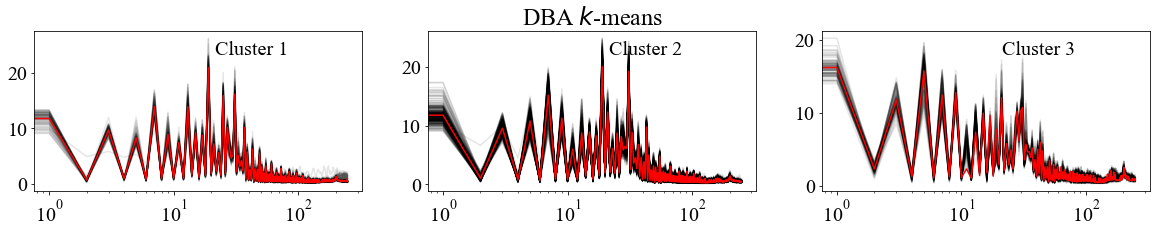

In [56]:
sh_scaled = TimeSeriesScalerMeanVariance().fit_transform(sharray)

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=100,
                          random_state=0)
y_pred = dba_km.fit_predict(sh_scaled[:450, :250, :])

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in sh_scaled[:450, :250, :][y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.1)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    #plt.xlim(0, sz)
    #plt.ylim(-4, 4)
    plt.xscale('log')
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

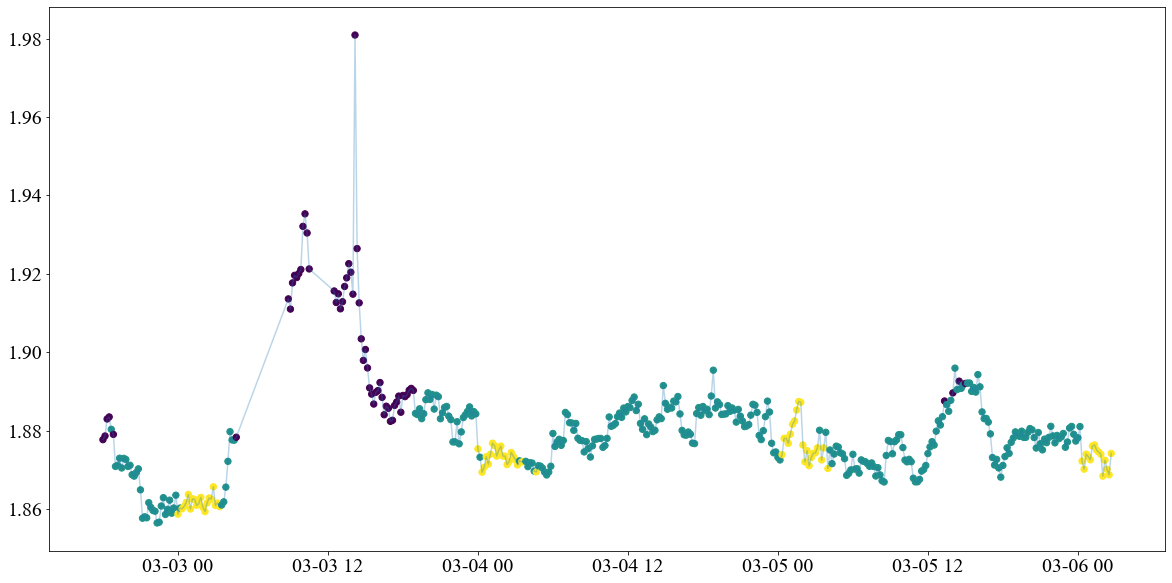

In [57]:
rmsi2 = rmsi_all_p1[rmsi_all_p1<2]
rmsi2 = rmsi2.dropna()
plt.plot(rmsi2[0:450], alpha=0.3)
plt.scatter(rmsi2.index[0:450], rmsi2[0:450], s=40, c=dba_km.labels_[0:450])